# Transformations - Translations and Rotations

In this kernel we're gonna learn to:
1. Perform Image Translations
2. Rotations with getRotationMatrix2D
3. Rotations with Transpose
4. Flipping Images

In [1]:
# Import libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Let's rewrite our imshow function
def imshow(image, title = '', size = 8):
  w, h = image.shape[0], image.shape[1]
  aspect_ratio = w / h
  plt.figure(figsize = (size * aspect_ratio, size))
  plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
  plt.title(title)
  plt.show()

In [3]:
# Download and unzip our images
!wget https://moderncomputervision.s3.eu-west-2.amazonaws.com/images.zip
!unzip -qq images.zip

--2022-08-24 14:44:29--  https://moderncomputervision.s3.eu-west-2.amazonaws.com/images.zip
Resolving moderncomputervision.s3.eu-west-2.amazonaws.com (moderncomputervision.s3.eu-west-2.amazonaws.com)... 52.95.142.22
Connecting to moderncomputervision.s3.eu-west-2.amazonaws.com (moderncomputervision.s3.eu-west-2.amazonaws.com)|52.95.142.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29586716 (28M) [application/zip]
Saving to: ‘images.zip’

images.zip          100%[===================>]  28.22M  6.72MB/s    in 4.2s    

2022-08-24 14:44:35 (6.72 MB/s) - ‘images.zip’ saved [29586716/29586716]



## Translations 

This is an affine transform that simply shifts the position of an image. (left or right).

We use `cv2.warpAffine()` function to implement these transformations.

`cv2.warpAffine(image, T, (width, height))`

* Tx - represents the shift along the x-axis (horizontal)
* Ty - represents the shift along the y-axis (vertical)

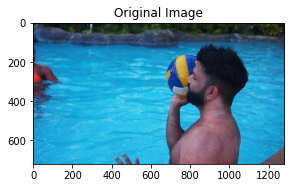

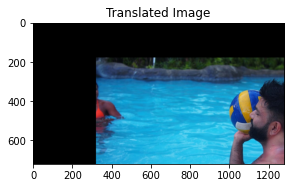

In [4]:
# Load and show our image
image = cv2.imread('images/Volleyball.jpeg')
imshow(image, title = 'Original Image')

# Store height and width of the image
height, width = image.shape[:2]

# Shift it by quarter of the height and width
quarter_height, quarter_width = height / 4, width / 4

# The translation
# T = [1 0 Tx]
#     [0 1 Ty]

# Define our translation matrix
T = np.float32([[1, 0, quarter_width], [0, 1, quarter_height]])

# Use warpAffine funtion to transform the image using the matrix T
img_translation = cv2.warpAffine(image, T, (width, height))
imshow(img_translation, 'Translated Image')

We've done the translation but, Personally I don't think it looks pretty well. Let's improve our visualization and make it much prettier by defining a function. 

In [5]:
# Let's define a translation function
def image_translation(image_path = ''):
  """
  Takes an image path loads the image and translates it.

  Args:
    image: the image path to upload and translate
  
  Returns:
    A Translated image
  """
  # Load the image and store its height and width
  untranslated_image = cv2.imread(image_path)
  height, width = untranslated_image.shape[:2]

  # Shift it by quarter of the height and width
  quarter_height = height / 4
  quarter_width = width / 4

  # Define translation matrix as T
  T = np.float32([[1, 0, quarter_width], [0, 1, quarter_height]])

  # Use warpAffine function to transform the image using our defined translation matrix (T)
  translated_image = cv2.warpAffine(untranslated_image, T, (width, height))

  # Plot our untranslated image
  plt.figure(figsize = (16, 9))
  plt.subplot(1, 2, 1)
  plt.imshow(cv2.cvtColor(untranslated_image,cv2.COLOR_BGR2RGB))
  plt.title('Non-Translated Image')
  plt.axis(False)
  
  # Plot our translated image
  plt.subplot(1, 2, 2)
  plt.imshow(cv2.cvtColor(translated_image, cv2.COLOR_BGR2RGB))
  plt.title('Translated Image')
  plt.axis(False)
  plt.show()

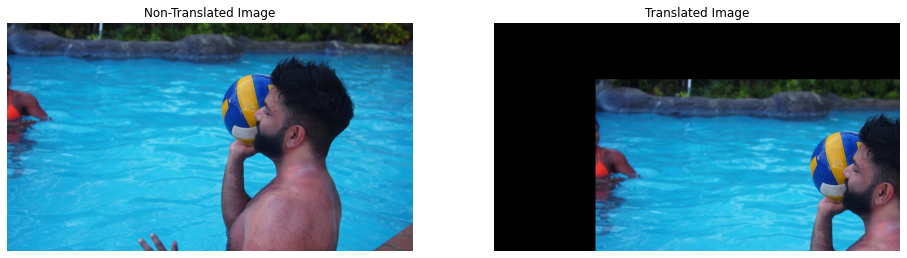

In [6]:
# Define the image path to use our image_translation function
image_path = 'images/Volleyball.jpeg'

# Visualize non-translated and translated images using our image_translation function
image_translation(image_path)

In [7]:
# What does T look like?
print(T)

[[  1.   0. 320.]
 [  0.   1. 180.]]


In [8]:
# Check the height, width and their quarters
height, width, quarter_height, quarter_width

(720, 1280, 180.0, 320.0)

## Rotations

To make a rotation on an image we could use two ways:
* `cv2.getRotationMatrix2D` function
* `cv2.Transpose` function (less flexible)

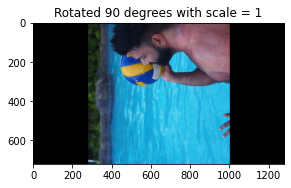

In [9]:
# Using cv2.getRotationMatrix2D (function)
# cv2.getRotationMatrix2D(rotation_center_x, rotation_center_y, angle of rotation, scale)

# Load our image and take its height and width
image = cv2.imread('images/Volleyball.jpeg')
height, width = image.shape[0], image.shape[1]

# Divide by two to rotate the image around its center 
rotation_matrix = cv2.getRotationMatrix2D((width/2, height/2), 90, 1)

# Input our image, the rotation matrix and our desired final width and height
rotated_image = cv2.warpAffine(image, rotation_matrix, (width, height))

# Show the image 
imshow(rotated_image, 'Rotated 90 degrees with scale = 1')

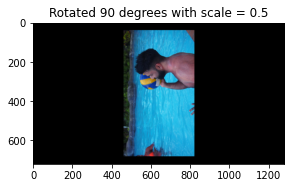

In [10]:
# Let's re-define rotation_matrix but this time we'll change scale to 0.5 to be able to see its effect
rotation_matrix = cv2.getRotationMatrix2D((width / 2, height / 2), 90, scale = 0.5)

# Again, Input our image, the rotation matrix and our desired final width and height 
rotated_image = cv2.warpAffine(image, rotation_matrix,(width, height))

# Show our image
imshow(rotated_image, 'Rotated 90 degrees with scale = 0.5')

Hmm... So far, Our rotation visualizations don't look as I expected. That would be good if we would define a function to make our visualizations much better!

In [11]:
# Define a rotation function
def image_rotation(image_path, scale):
  """
  """
  # Read the image and take its height and width
  unrotated_image = cv2.imread(image_path)
  height, width = unrotated_image.shape[0], unrotated_image.shape[1]

  # Define the rotation matrix
  rotation_matrix = cv2.getRotationMatrix2D((width / 2, height / 2), 90, scale = scale)

  # Use warpAffine function to rotate the image using our defined rotation matrix 
  rotated_image = cv2.warpAffine(image, rotation_matrix, (width, height))

  # Plot our untranslated image
  plt.figure(figsize = (16, 9))
  plt.subplot(1, 2, 1)
  plt.imshow(cv2.cvtColor(unrotated_image, cv2.COLOR_BGR2RGB))
  plt.title('Non-Rotated Image')
  plt.axis(False)
  
  # Plot our translated image
  plt.subplot(1, 2, 2)
  plt.imshow(cv2.cvtColor(rotated_image, cv2.COLOR_BGR2RGB))
  plt.title('Rotated Image')
  plt.axis(False)
  plt.show()


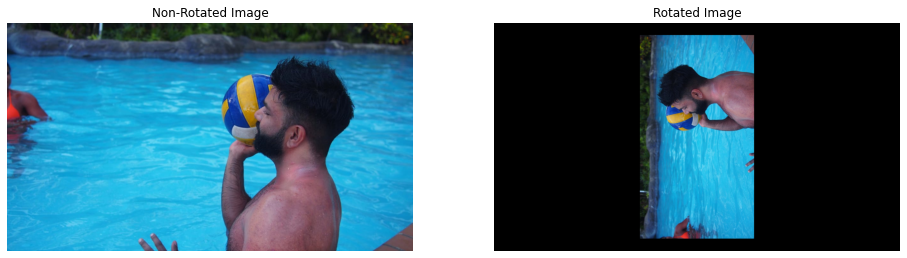

In [12]:
# Define an image path
image_path = 'images/Volleyball.jpeg'

# Let's test our image_rotation function
image_rotation(image_path, scale = 0.5)

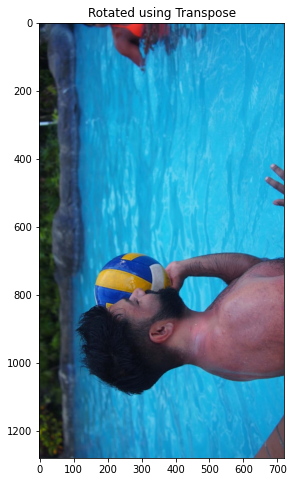

In [13]:
# Rotations with cv2.transpose
rotated_image = cv2.transpose(image)

# Show our transposed image
imshow(rotated_image, 'Rotated using Transpose')

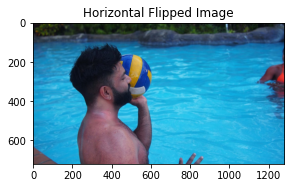

In [14]:
# Lastly, let's look at horizontal flip
flipped_image = cv2.flip(image, 1)
imshow(flipped_image, 'Horizontal Flipped Image')